In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
dataset_path = 'Dataset/rps/'
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    validation_split=0.3  
)

batch_size = 64
image_size = (150, 150)  

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse', 
    subset='training' 
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'  
)


Found 1767 images belonging to 3 classes.
Found 756 images belonging to 3 classes.


In [3]:
x_val, y_val = [], []
for _ in range(len(validation_generator)):
    x_batch, y_batch = validation_generator.next()
    x_val.extend(x_batch)
    y_val.extend(y_batch)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [4]:
x_val.shape

(756, 150, 150, 3)

In [5]:
y_val.shape

(756,)

{0: [], 1: [], 2: []}


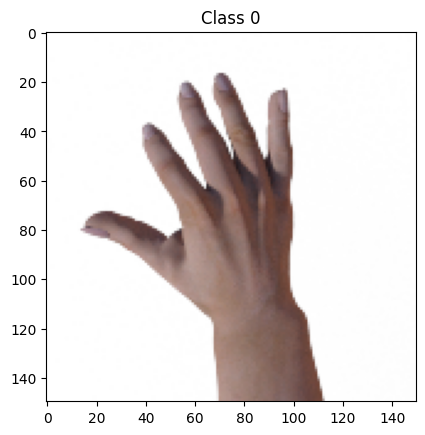

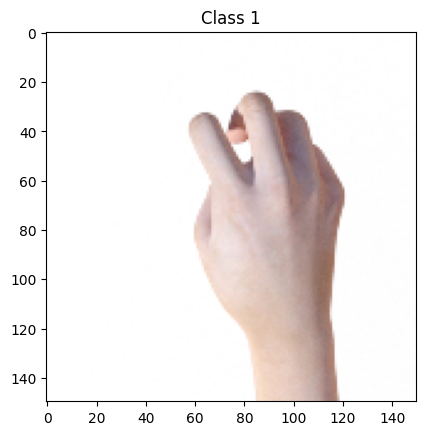

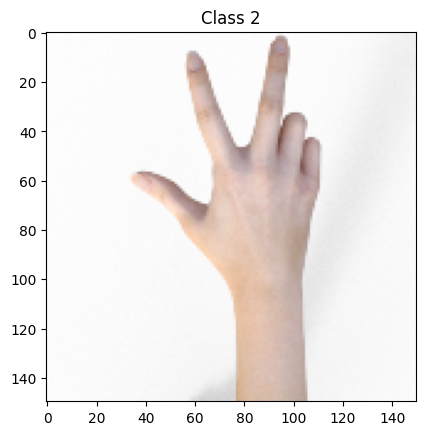

In [7]:
n = len(np.unique(y_val))

class_images = {i: [] for i in range(n)}
print(class_images)
for i in range(len(y_val)):
    label = y_val[i]
    class_images[label].append(x_val[i])

for label, images in class_images.items():
    plt.figure()
    plt.imshow(images[0])
    plt.title(f"Class {label}")
    plt.show()



In [7]:
x_val[0].shape

(150, 150, 3)

In [6]:
lbl = pd.DataFrame(y_val, columns=['label'])
# lbl.label.unique()
lbl


,label
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
751,1.0
752,2.0
753,2.0
754,0.0


In [7]:
lbl.label.value_counts()

label
0.0    252
1.0    252
2.0    252
Name: count, dtype: int64

In [8]:
# x_train, x_temp, y_train, y_temp = train_test_split(data, label, test_size=0.3, random_state=42)

x_validation, x_test, y_validation, y_test = train_test_split(x_val,y_val, test_size=0.1665, random_state=42)

In [9]:
y_validation

array([0., 2., 1., 1., 1., 1., 1., 1., 2., 0., 0., 0., 0., 2., 1., 2., 1.,
       0., 2., 0., 0., 0., 2., 1., 1., 1., 2., 1., 0., 0., 2., 1., 2., 2.,
       2., 1., 0., 2., 1., 2., 0., 0., 0., 1., 2., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 0., 2., 2., 2., 0., 0., 1., 2., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 2., 2., 0., 0., 2., 0., 2., 1., 0., 2.,
       1., 1., 1., 0., 2., 2., 2., 0., 1., 0., 0., 0., 2., 0., 0., 2., 2.,
       1., 2., 0., 1., 2., 1., 0., 2., 0., 0., 2., 0., 2., 1., 1., 1., 1.,
       1., 1., 0., 0., 2., 0., 1., 0., 0., 2., 2., 2., 2., 2., 1., 0., 2.,
       0., 2., 2., 1., 0., 2., 0., 2., 1., 1., 2., 0., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 0., 0., 2., 2., 1., 2., 1., 0., 1., 2., 1., 2., 1.,
       2., 2., 2., 0., 0., 2., 0., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       0., 1., 0., 2., 0., 1., 2., 0., 2., 1., 0., 0., 2., 1., 0., 2., 2.,
       0., 2., 0., 2., 2., 2., 1., 0., 2., 2., 2., 0., 2., 1., 0., 1., 1.,
       0., 0., 1., 2., 2.

In [10]:
print(x_test.shape)

(126, 150, 150, 3)


In [11]:
print(x_validation.shape)

(630, 150, 150, 3)


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout added
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [25]:
history = model.fit(train_generator, epochs=20, validation_data=(x_validation,y_validation))


Epoch 1/20
28/28 [==============================] - 9s 334ms/step - loss: 0.1353 - accuracy: 0.9508 - val_loss: 1.2888 - val_accuracy: 0.6524
Epoch 2/20
28/28 [==============================] - 10s 338ms/step - loss: 0.1078 - accuracy: 0.9547 - val_loss: 1.4800 - val_accuracy: 0.6508
Epoch 3/20
28/28 [==============================] - 10s 345ms/step - loss: 0.1149 - accuracy: 0.9485 - val_loss: 1.9651 - val_accuracy: 0.5984
Epoch 4/20
28/28 [==============================] - 9s 337ms/step - loss: 0.0966 - accuracy: 0.9576 - val_loss: 2.0324 - val_accuracy: 0.5921
Epoch 5/20
28/28 [==============================] - 10s 367ms/step - loss: 0.0983 - accuracy: 0.9638 - val_loss: 1.9975 - val_accuracy: 0.5937
Epoch 6/20
28/28 [==============================] - 10s 340ms/step - loss: 0.0980 - accuracy: 0.9610 - val_loss: 2.1044 - val_accuracy: 0.5873
Epoch 7/20
28/28 [==============================] - 11s 391ms/step - loss: 0.1052 - accuracy: 0.9519 - val_loss: 1.3405 - val_accuracy: 0.6651
E

In [26]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']  # For classification tasks
val_accuracy = history.history['val_accuracy']  # For classification tasks


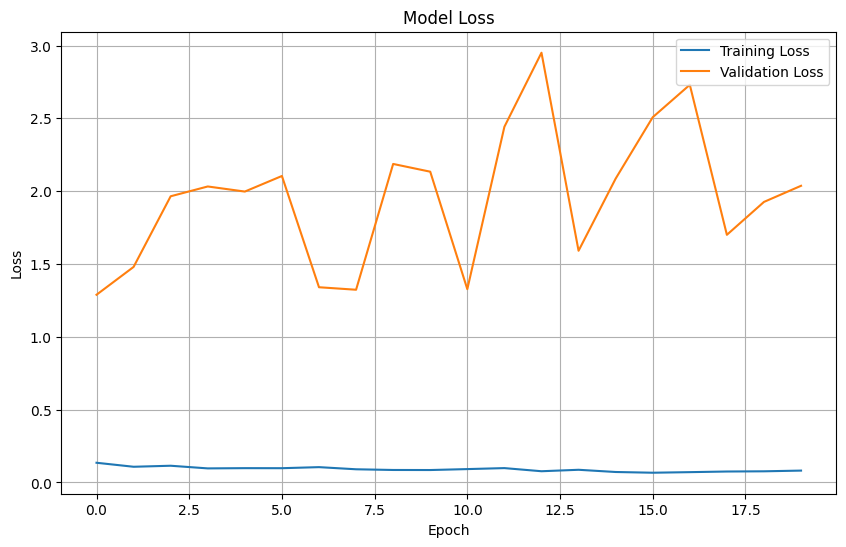

In [27]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


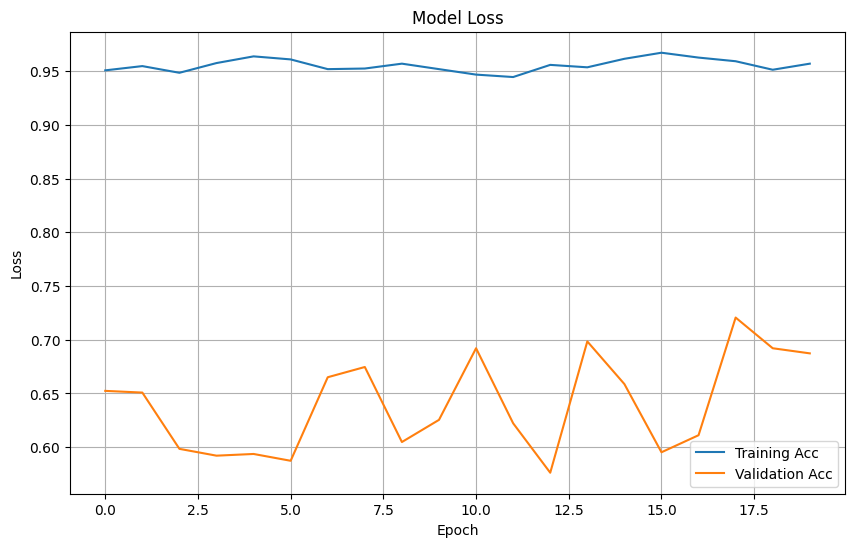

In [38]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Acc')
plt.plot(val_accuracy, label='Validation Acc')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [16]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
56/56 [==============================] - 10s 160ms/step - loss: 1.1275 - accuracy: 0.4269 - val_loss: 1.0090 - val_accuracy: 0.6810
Epoch 2/10
56/56 [==============================] - 9s 169ms/step - loss: 0.5916 - accuracy: 0.7557 - val_loss: 0.2301 - val_accuracy: 0.9508
Epoch 3/10
56/56 [==============================] - 10s 176ms/step - loss: 0.2026 - accuracy: 0.9269 - val_loss: 0.1368 - val_accuracy: 0.9667
Epoch 4/10
56/56 [==============================] - 9s 160ms/step - loss: 0.1083 - accuracy: 0.9620 - val_loss: 0.0315 - val_accuracy: 0.9921
Epoch 5/10
56/56 [==============================] - 9s 160ms/step - loss: 0.0908 - accuracy: 0.9671 - val_loss: 0.0139 - val_accuracy: 0.9968
Epoch 6/10
56/56 [==============================] - 9s 161ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0148 - val_accuracy: 0.9968
Epoch 7/10
56/56 [==============================] - 9s 162ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.0090 - val_accuracy: 0.9968
Epoc

In [28]:
test_loss, test_accuracy = model.evaluate(x_validation, y_validation)
print(f'Test Accuracy: {test_accuracy:.4f}')

20/20 [==============================] - 1s 29ms/step - loss: 2.0371 - accuracy: 0.6873
Test Accuracy: 0.6873


In [29]:
# Make predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f'Accuracy on test data: {accuracy:.4f}')

4/4 [==============================] - 0s 29ms/step
Accuracy on test data: 0.7540


In [30]:
y_test = y_test  # or y_test.ravel()
predicted_labels = predicted_labels

comparasion = pd.DataFrame({'True Label'  : y_test.astype(int), "Predict Label" : predicted_labels})
comparasion

,True Label,Predict Label
0,1,1
1,2,2
2,1,1
3,1,1
4,2,0
...,...,...
121,0,0
122,0,0
123,2,2
124,1,1


In [31]:
predicted_labels[0]

1

In [32]:
print(comparasion['True Label'].value_counts())
print(comparasion['Predict Label'].value_counts())

True Label
2    49
1    40
0    37
Name: count, dtype: int64
Predict Label
0    65
2    32
1    29
Name: count, dtype: int64


In [33]:
target_names = ['Paper', 'Rock','Scissor']
print(classification_report(y_test, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

       Paper       0.57      1.00      0.73        37
        Rock       0.93      0.68      0.78        40
     Scissor       0.97      0.63      0.77        49

    accuracy                           0.75       126
   macro avg       0.82      0.77      0.76       126
weighted avg       0.84      0.75      0.76       126



In [34]:
x_test.shape

(126, 150, 150, 3)

In [36]:
x_test.shape[0]

126

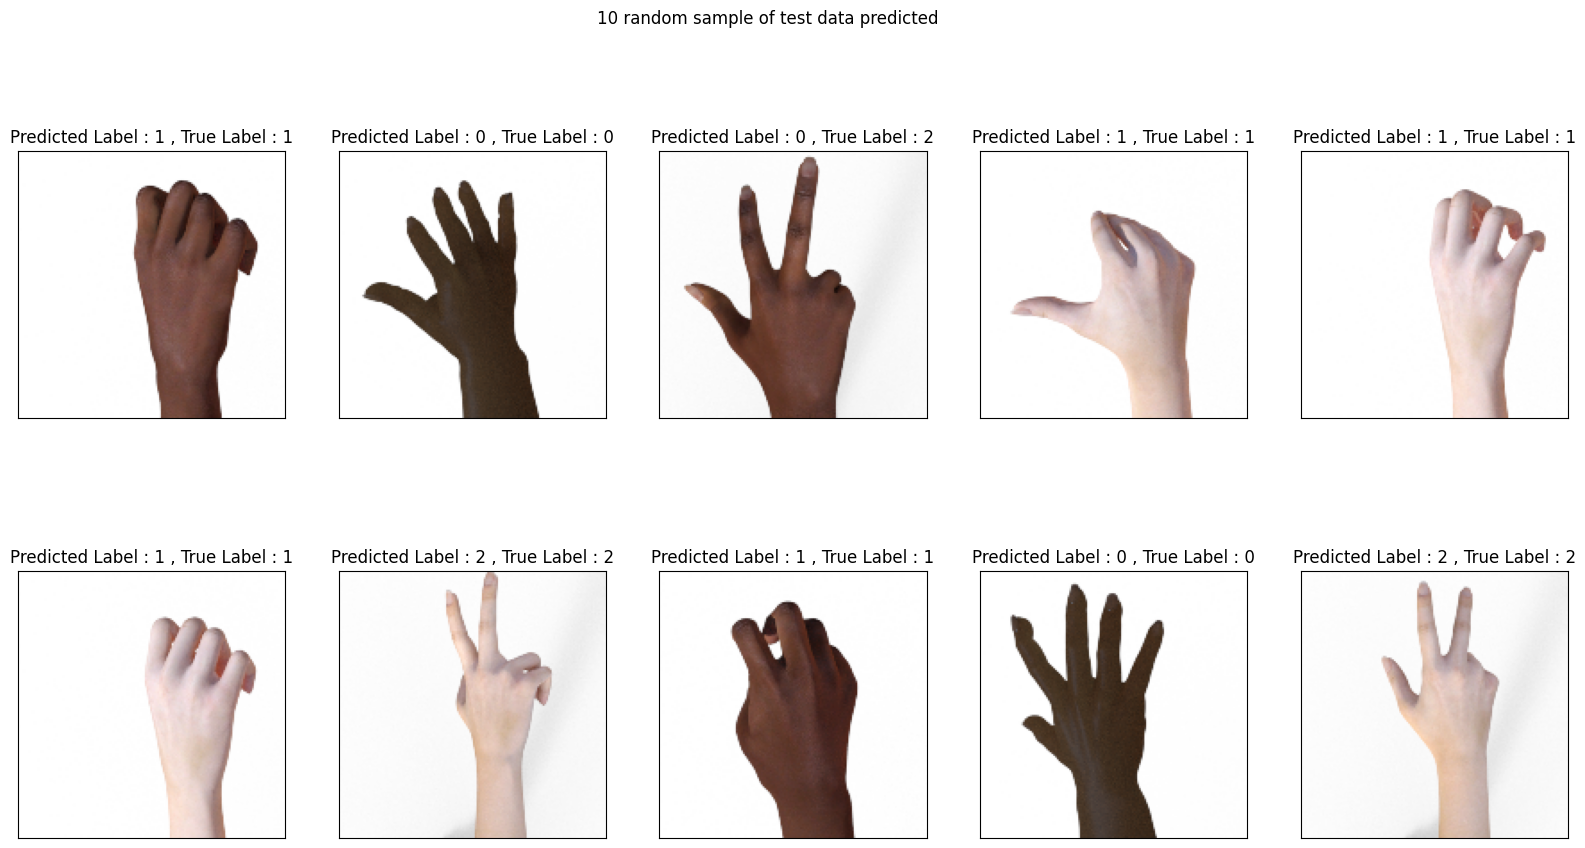

In [37]:
gambar = [img for img in x_test]
indicies = np.random.choice(x_test.shape[0], size = 10,replace=False)
fig, ax = plt.subplots(2,5, figsize=(20,10))

fig.suptitle('10 random sample of test data predicted')
for j in range(0,5):
    i=0
    ax[i,j].set_title('Predicted Label : {} , True Label : {}'.format(predicted_labels[indicies[j]], y_test[indicies[j]].astype(int)))
    ax[i,j].imshow(x_test[indicies[j]])
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])

k=0
for x in range (5,10):
    j=1
    ax[j,k].set_title('Predicted Label : {} , True Label : {}'.format(predicted_labels[indicies[x]], y_test[indicies[x]].astype(int)))
    ax[j,k].imshow(x_test[indicies[x]])
    ax[j,k].set_xticks([])
    ax[j,k].set_yticks([])
    k+=1

In [226]:
indicies

array([ 76,  68, 119,  51,  73,  24,  62, 111,  19,  50])

In [ ]:
rand_sample

In [214]:
indx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125]